In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('mobile.csv')
df.head()

,battery_power,n_cores,px_height,px_width,ram,price_range
0,842,2,20,756,2549,1
1,1021,3,905,1988,2631,2
2,563,5,1263,1716,2603,2
3,615,6,1216,1786,2769,2
4,1821,2,1208,1212,1411,1


In [3]:
df.isnull().sum()

battery_power    0
n_cores          0
px_height        0
px_width         0
ram              0
price_range      0
dtype: int64

In [4]:
x = df.iloc[:, :-1]
y = df['price_range']

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [6]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((38, 5), (38,), (10, 5), (10,))

In [7]:
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

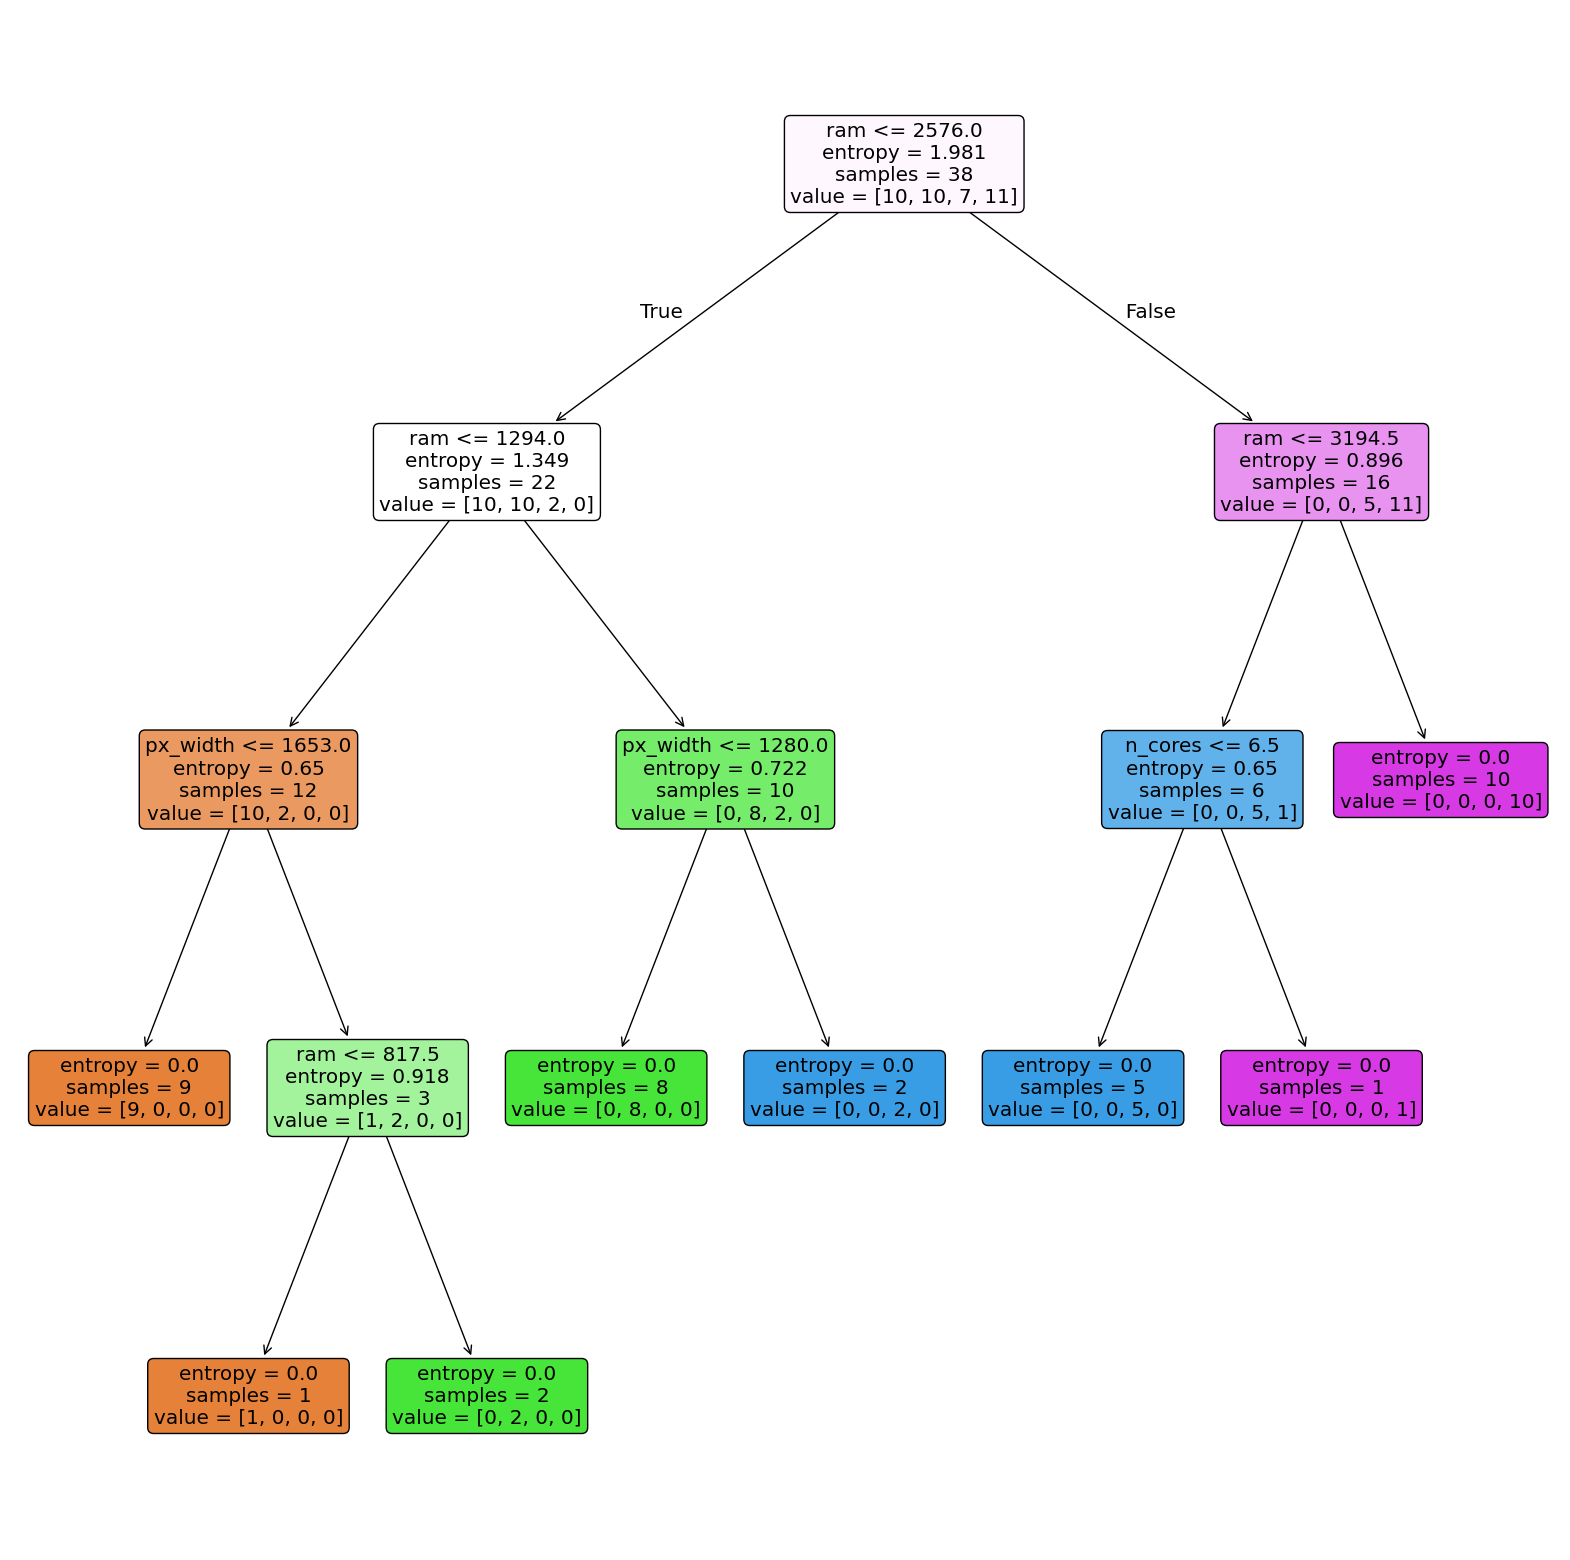

In [8]:
plt.figure(figsize=(20, 20))
plot_tree(dt, filled=True, feature_names=x.columns, rounded=True)
plt.show()

In [9]:
dt.score(x_test, y_test)

0.6

In [10]:
y_pred = dt.predict(x_test)
y_pred

array([3, 1, 3, 2, 2, 3, 1, 1, 1, 3])

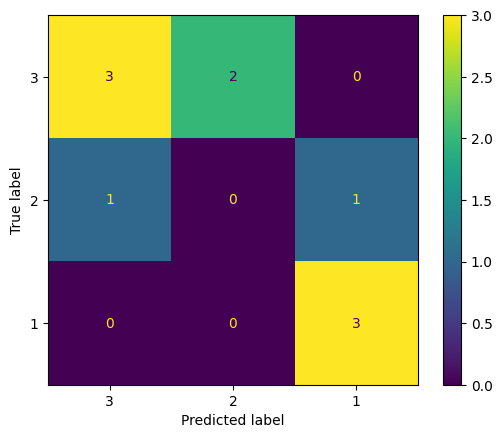

In [11]:
from sklearn.metrics import *

cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=y_test.unique())
cm_display.plot()
plt.show()

In [12]:
dt.predict([[847, 3, 200, 900, 2500]])

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [13]:
print("Classification_Report: \n", classification_report(y_test, y_pred))

Classification_Report: 
               precision    recall  f1-score   support

           1       0.75      0.60      0.67         5
           2       0.00      0.00      0.00         2
           3       0.75      1.00      0.86         3

    accuracy                           0.60        10
   macro avg       0.50      0.53      0.51        10
weighted avg       0.60      0.60      0.59        10



In [15]:
print(f'Accuracy_score: {accuracy_score(y_test, y_pred)}')

Accuracy_score: 0.6
